In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

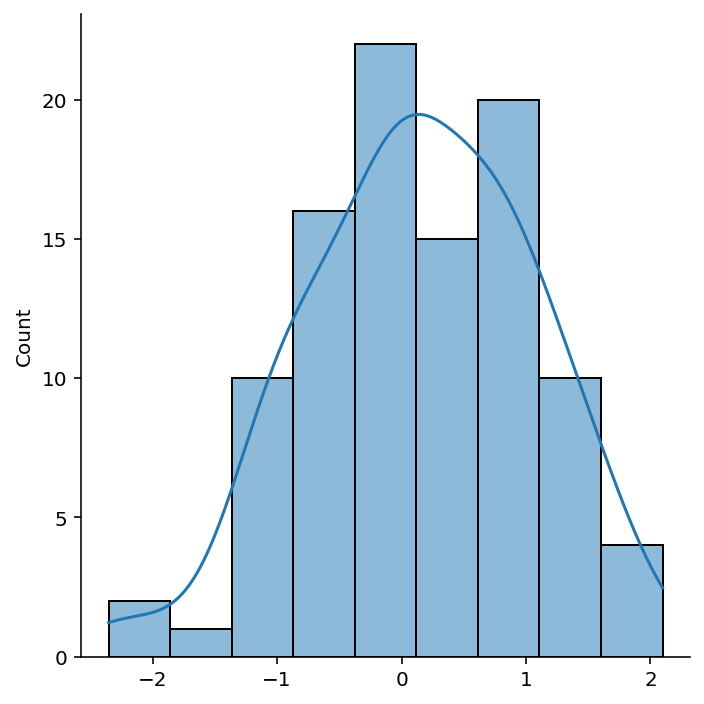

In [38]:
dist = torch.distributions.Normal(0, 1)

# Generate data
data = dist.sample((100,))

# Plot data
_ = sns.displot(data, kde=True)

In [39]:
# Let us pick up a set of K points and find the MLE for the mean and variance
def estimate_distribution_K_points(dataset, random_seed = 1, K = 5):
    assert K > 1
    assert K < len(dataset)

    # Set random seed
    torch.manual_seed(random_seed)

    # Sample K points
    sample = dataset[torch.randperm(len(dataset))[:K]]

    # Compute MLE for mean and variance
    mean = sample.mean()
    variance = sample.var()

    return mean, variance, sample




In [45]:
# Plot the MLE obtained distribution and sample points
def plot_distribution_and_sample_points(dataset, mean, variance, sample):
    dist = torch.distributions.Normal(mean, variance.sqrt())   
    x = torch.linspace(-3, 3, 1000)
    y = dist.log_prob(x).exp()
    plt.plot(x, y, label='MLE distribution')
    plt.scatter(sample, torch.zeros_like(sample), label='Sample points')
    # Plot true distribution
    true_dist = torch.distributions.Normal(0, 1)
    plt.plot(x, true_dist.log_prob(x).exp(), label='True distribution')
    plt.legend()
    plt.ylim(0, 2.0)


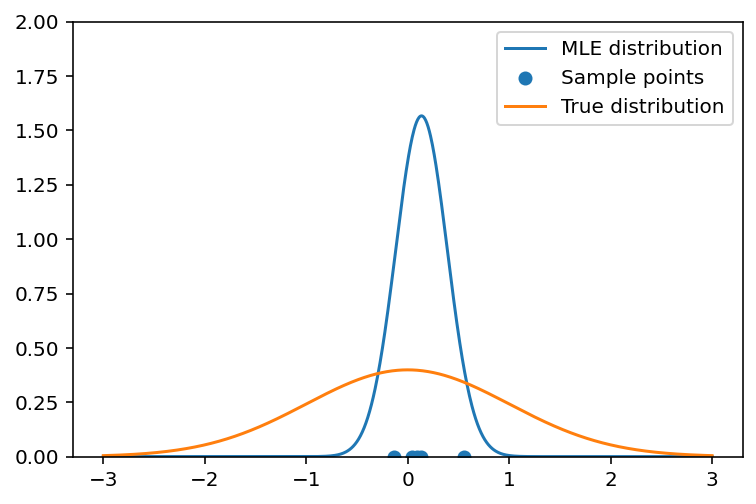

In [46]:
mean, variance, sample = estimate_distribution_K_points(data, K=5, random_seed=1)
plot_distribution_and_sample_points(data, mean, variance, sample)

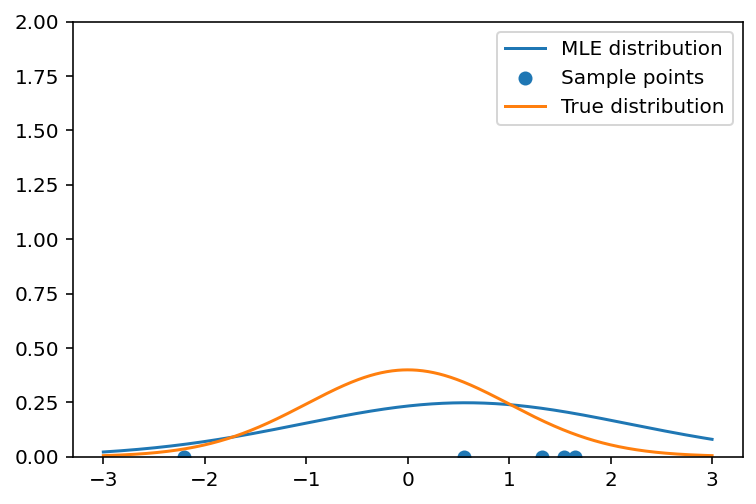

In [47]:
mean, variance, sample = estimate_distribution_K_points(data, K=5, random_seed=2)
plot_distribution_and_sample_points(data, mean, variance, sample)

In [48]:
# Now, let us average the MLE estimates over N runs of different K points

def estimate_distribution_N_runs(dataset, N = 100, K = 5):
    means = []
    variances = []
    for i in range(N):
        mean, variance, _ = estimate_distribution_K_points(dataset, random_seed=i, K=K)
        means.append(mean)
        variances.append(variance)
    return torch.stack(means).mean(), torch.stack(variances).mean()

estimate_distribution_N_runs(data, N=5000, K=5)



(tensor(0.1436), tensor(0.8121))

In [49]:
np.std(data.numpy())

0.8992455

In [50]:
pd.Series(data.numpy()).describe()

count    100.000000
mean       0.147505
std        0.903776
min       -2.353761
25%       -0.485727
50%        0.082224
75%        0.803662
max        2.097163
dtype: float64